In [4]:
import numpy as np
import matplotlib.pyplot as plt

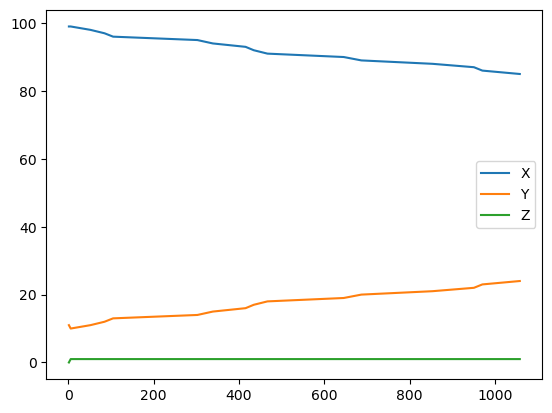

In [46]:
"""
Exercise 1 // Implement Gillespies algorithm
In this exercise Gillespies First Reaction Method is used to evaluate the development of the SIR model. The parameters given are
X: number of susceptible hosts 
Y: number of infectious hosts
Z: number of recovered hosts
beta: rate of infection
gamma: rate of recovery
mu_b: rate of births
mu_d: rate of deaths
t: time
noise: a tuple shapes as (noise of beta, noise of gamma, noise of mu_b, noise of mu_d), its default is set to (0,0,0,0) so there is no noise
"""

def noise_func(noise_term):
    # this function multiplies the noise term with a number between -1 and 1
    return noise_term * ((np.random.rand() * 2) - 1)

def step(X, Y, Z, beta, gamma, mu_b, mu_d, t, noise=(0,0,0,0)):
    noise_b, noise_g, noise_mb, noise_md = noise
    N = X + Y + Z

    # setting the consequences of each event
    event_list = [[1, 0, 0],
                  [-1, 1, 0],
                  [0, -1, 1],
                  [-1, 0, 0],
                  [0, -1, 0],
                  [0, 0, -1]]

    # setting the rate of each event
    R_B = (mu_b + noise_func(noise_mb)) * N
    R_I = (beta + noise_func(noise_b)) * X * Y / N
    R_R = (gamma + noise_func(noise_g)) * Y
    R_DX = (mu_d + noise_func(noise_md)) * X
    R_DY= (mu_d + noise_func(noise_md)) * Y
    R_DZ = (mu_d + noise_func(noise_md)) * Z

    rate_list = [R_B, R_I, R_R, R_DX, R_DY, R_DZ]

    # finding the event which happens first
    dt_min = -1/rate_list[0] * np.log(np.random.rand())
    p = 0
    for m in range(1, len(rate_list)):
        if rate_list[m] > 0:
            dt = -1/rate_list[m] * np.log(np.random.rand())

            if dt < dt_min:
                dt_min = dt
                p = m

    # updating values
    t+=dt
    X += event_list[p][0]
    Y += event_list[p][1]
    Z += event_list[p][2]

    return t, X, Y, Z

# parameters
X = 1000
Y = 100
Z = 0
beta = 3
gamma = 1
mu_b = 1/60
mu_d = 1/60
t = 0
noise_b = 0
noise_g = 0
noise_mb = 0
noise_md = 0
noise = (noise_b, noise_g, noise_mb, noise_md)

t_list, X_list, Y_list, Z_list = [], [], [], []
while t < 1000:
    t, X, Y, Z = step(X, Y, Z, beta, gamma, mu_b, mu_d, t, noise)

    t_list.append(t)
    X_list.append(X)
    Y_list.append(Y)
    Z_list.append(Z)

plt.plot(t_list, X_list, label='X')
plt.plot(t_list, Y_list, label='Y')
plt.plot(t_list, Z_list, label='Z')
plt.legend()
plt.show()

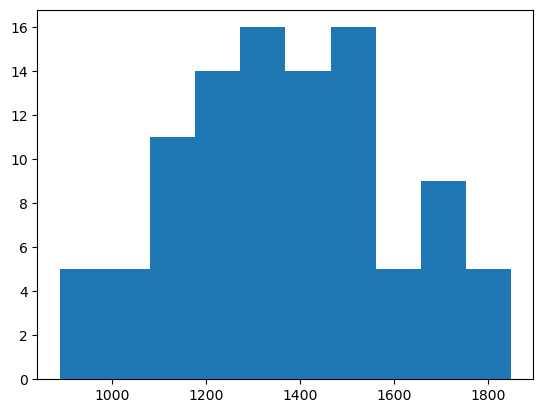

(array([ 1.,  2., 10., 12., 20., 22., 24.,  5.,  3.,  1.]),
 array([ 318.44180022,  635.13152899,  951.82125775, 1268.51098651,
        1585.20071528, 1901.89044404, 2218.5801728 , 2535.26990157,
        2851.95963033, 3168.64935909, 3485.33908786]),
 <BarContainer object of 10 artists>)

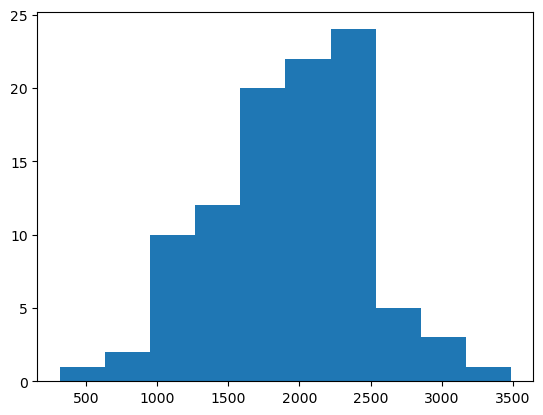

In [6]:
"""
Exercise 1 // Investigate Simulation Variability and Negative Co-variance
"""
def var(data):
    # Used formula for population since we know all data and thus are not dealing w/ a sample
    length_data = len(data)
    mean_data = np.mean(data)
    var_data = 0

    for i in data:
        var_data += (i - mean_data) ** 2

    return var_data / length_data

def covar(data1, data2):
    length_data = len(data1)
    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    var_data = 0

    for i in range(length_data):
        var_data += (data1[i] - mean_data1) * (data2[i] - mean_data2)

    return var_data / length_data

def run(n_average, t_max, X0, Y0, Z0, beta, gamma, mu_b, mu_d, noise=(0,0,0,0)):
    var_list, covar_list = [], []
    for _ in range(n_average):
        t_list, X_list, Y_list, Z_list = [], [], [], []
        t=0
        X=X0
        Y=Y0
        Z=Z0
        while t < t_max:
            t, X, Y, Z = step(X, Y, Z, beta, gamma, mu_b, mu_d, t, noise)

            t_list.append(t)
            X_list.append(X)
            Y_list.append(Y)
            Z_list.append(Z)

        var_list.append(var(Y_list))
        covar_list.append(covar(X_list, Y_list))

    return var_list, covar_list

n_average=100
t_max=300

var_list, covar_list = run(n_average, t_max, X, Y, Z, beta, gamma, mu_b, mu_d, noise)     

plt.hist(var_list)

plt.show()
plt.clf()

plt.hist(covar_list)

